# Решающее дерево

Решающее дерево — это модель, которая предсказывает значение (или класс) целевой переменной, разбивая данные на последовательность простых если‑то правил на основе признаков.\
Каждая внутренняя вершина (нода) отвечает за решение: «разбить по признаку X > порог?» и т. д. Лист — это финальный результат: значение или метка

## 	Как дерево выбирает разбиения?

* Оценивается качество разделения (split) по каждой фиче по критериям:
    * Для классификации: энтропия / Gini impurity
    * Для регрессии: уменьшение дисперсии (MSE, MAE)
* Выбирается признак с максимальным приростом информации (Information Gain):\
  $IG(T,a)=H(T)−H(T∣a)$
где $H$ — энтропия, а $𝐻(𝑇∣𝑎)$ — её остаток после разбиения по $𝑎$

## Преимущества и ограничения

Плюсы:\
* Простая и понятная структура
* Подходит и для числовых, и для категориальных признаков
* Не требует масштабирования фичей
* Можно визуализировать решения\

Минусы:\
* Риск переобучения (overfitting) при большой глубине дерева
* Нестабильность: маленькие изменения в данных — сильно меняется структура дерева
* Часто применяют ограничения глубины, минимальные размеры листов, отсечение (pruning) для борьбы с overfitting 

## Пример (регрессия)

In [20]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt

In [21]:
#Генерация синтетических данных
np.random.seed(42)
X = np.sort(5 * np.random.rand(100,1), axis=0)
y = np.sin(X).ravel() + np.random.normal(0, 0.2, X.shape[0])

In [22]:
#Разделение на выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
#Обучение модели
model = DecisionTreeRegressor(max_depth=5, random_state=42)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [34]:
print("MSE:", mean_squared_error(y_test, y_pred), "R2:", r2_score(y_test, y_pred))

MSE: 0.03072860436709825 R2: 0.9370825497503406


In [35]:
#Создание точек для визуализации
X_grid = np.arange(X.min(), X.max(), 0.01)[:, np.newaxis]
y_grid = model.predict(X_grid)

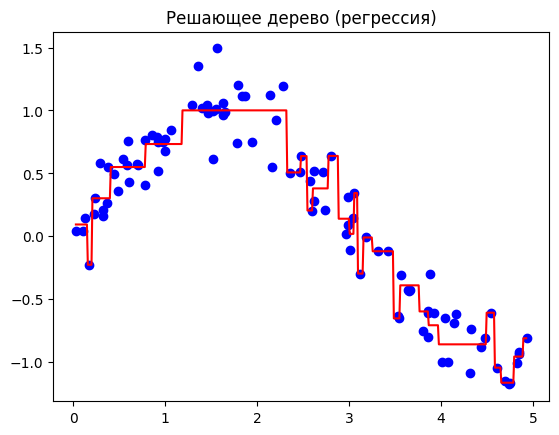

In [36]:
#Визуализация
%matplotlib inline

plt.scatter(X, y, color='blue')
plt.plot(X_grid, y_grid, color='red')
plt.title("Решающее дерево (регрессия)")
plt.show()

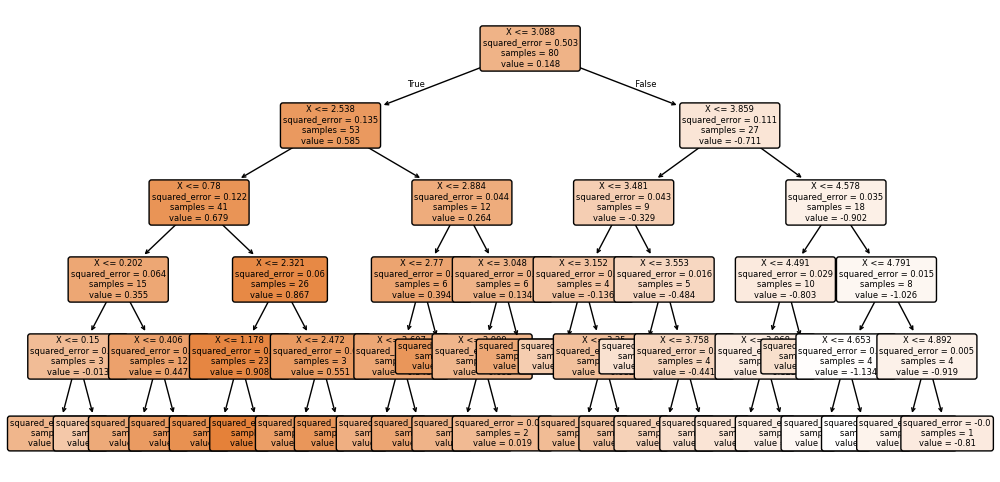

In [45]:
#Визуализация структуры дерева
plt.figure(figsize=(12,6))
plot_tree(model,
         feature_names=["X"],
         filled=True,
         rounded=True,
         fontsize=6)
plt.show()